In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import yfinance as yf

%config InlineBackend.figure_format = 'retina'

sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

# Чтение данных

In [2]:
prices = pd.read_csv('prices.csv')
indexes = pd.read_csv('indexes.csv')
prices.drop(columns=['Unnamed: 0'], inplace=True)
indexes.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
returns = {}
for i in prices.drop(columns=['Date']).columns:
    returns[i] = np.log(np.array(prices[i])[1:]/np.array(prices[i])[:-1])
returns = pd.DataFrame(returns)

In [4]:
to_delete = []
for i in returns.columns:
    cur_dict = returns[i].value_counts()
    if 0 in cur_dict and cur_dict[0] > returns.shape[0] * 0.05:
        to_delete.append(i)
returns.drop(columns=to_delete, inplace=True)

In [5]:
indexes_returns = np.log(np.array(indexes['Close'])[1:]/np.array(indexes['Close'])[:-1])

In [6]:
returns.head(5)

,013A.BE,013A.SG,016.BE,01H.DU,01K.SG,01T.DU,02G.BE,02M.BE,02M.MU,02M.SG,...,ZSV.BE,ZSV.DU,ZT1A.SG,ZVA.BE,ZVA.SG,ZVX.BE,ZVX.SG,ZYA.DU,ZYA.MU,ZYA.SG
0,0.044388,0.009771,0.055880,-0.004040,-0.008807,0.000000,-0.028710,0.013377,0.037058,0.006658,...,0.007149,0.006873,0.002987,0.016625,-0.007392,0.015851,0.032383,-0.012423,-0.015363,0.002488
1,0.019418,0.000000,0.007220,0.022023,-0.007477,0.015152,-0.019608,0.000000,0.000455,0.000000,...,-0.020762,-0.020762,0.023122,0.009844,0.052200,0.021733,-0.055525,0.012423,0.006899,0.012346
2,-0.008276,0.048527,-0.021819,0.029270,0.067115,0.000000,-0.014963,0.008969,0.009050,0.009050,...,-0.007018,-0.007018,0.022600,0.000816,-0.014185,-0.034065,-0.009602,0.006154,0.006231,-0.006154
3,0.056543,0.015666,0.000000,0.000000,0.017392,0.000000,-0.005038,-0.018018,0.017858,-0.009050,...,-0.007067,-0.014185,0.005571,0.077656,0.015748,-0.006342,-0.034351,0.006116,0.006192,0.012270
4,0.020726,0.002587,0.043172,0.009569,0.033902,0.007491,-0.020408,0.009050,-0.036040,-0.018349,...,0.000000,0.000000,0.021979,-0.008337,-0.011788,0.001177,0.058890,0.012121,0.012270,0.030032


# 1. Efficient frontier.

Выберем 50 лучших акций по коэффициенту Шарпа.

In [7]:
sharpe = (returns.mean() / returns.std()).sort_values(ascending=False)[:50]
names = list(dict(sharpe).keys())
returns = returns[names]

In [8]:
returns.head()

,2EV.SG,HOO.BE,ADY.BE,EFC1.BE,WD1.SG,HOO.SG,ADY.SG,EFC1.DU,EFC1.SG,OEWA.DE,...,EUZ.SG,DO2.BE,CIE1.HM,OEWA.HM,FO8.BE,FAN.BE,3E2.BE,TEG.DE,CIE1.BE,HT2.MU
0,-0.011893,0.016094,0.019789,-0.001617,-0.012209,-0.009565,-0.021573,-0.000462,-0.001112,0.000000,...,-0.004581,0.003616,0.011628,-0.007968,0.018098,0.014691,-0.004376,0.024369,0.010459,-0.006557
1,0.026433,0.000000,-0.018182,-0.000925,0.015666,0.008811,0.013986,-0.001849,0.000000,0.038259,...,0.017070,-0.007547,0.011494,-0.000500,0.016173,0.000000,-0.011765,0.000617,0.017192,0.006557
2,0.017242,0.008734,0.004577,0.006687,0.000000,0.017392,-0.013986,0.006226,0.020189,0.005758,...,0.008427,-0.007605,0.016998,0.032967,-0.027102,0.016529,-0.011905,0.012872,0.011299,0.000000
3,-0.008584,0.017242,0.000000,0.016639,0.005168,0.000000,-0.004706,0.017320,-0.010043,-0.002875,...,0.026227,0.000000,-0.011299,0.014416,0.010929,0.008163,0.005970,0.012708,-0.005634,0.000000
4,0.000000,-0.008584,-0.041964,-0.003396,0.010257,0.000000,-0.019048,-0.003848,0.003207,0.000959,...,0.016217,0.030077,0.033523,0.007605,0.021506,0.008097,0.005935,-0.002408,0.027857,0.019418


Визуализируем 50 лучших акций в системе координат $(\sigma, E)$.

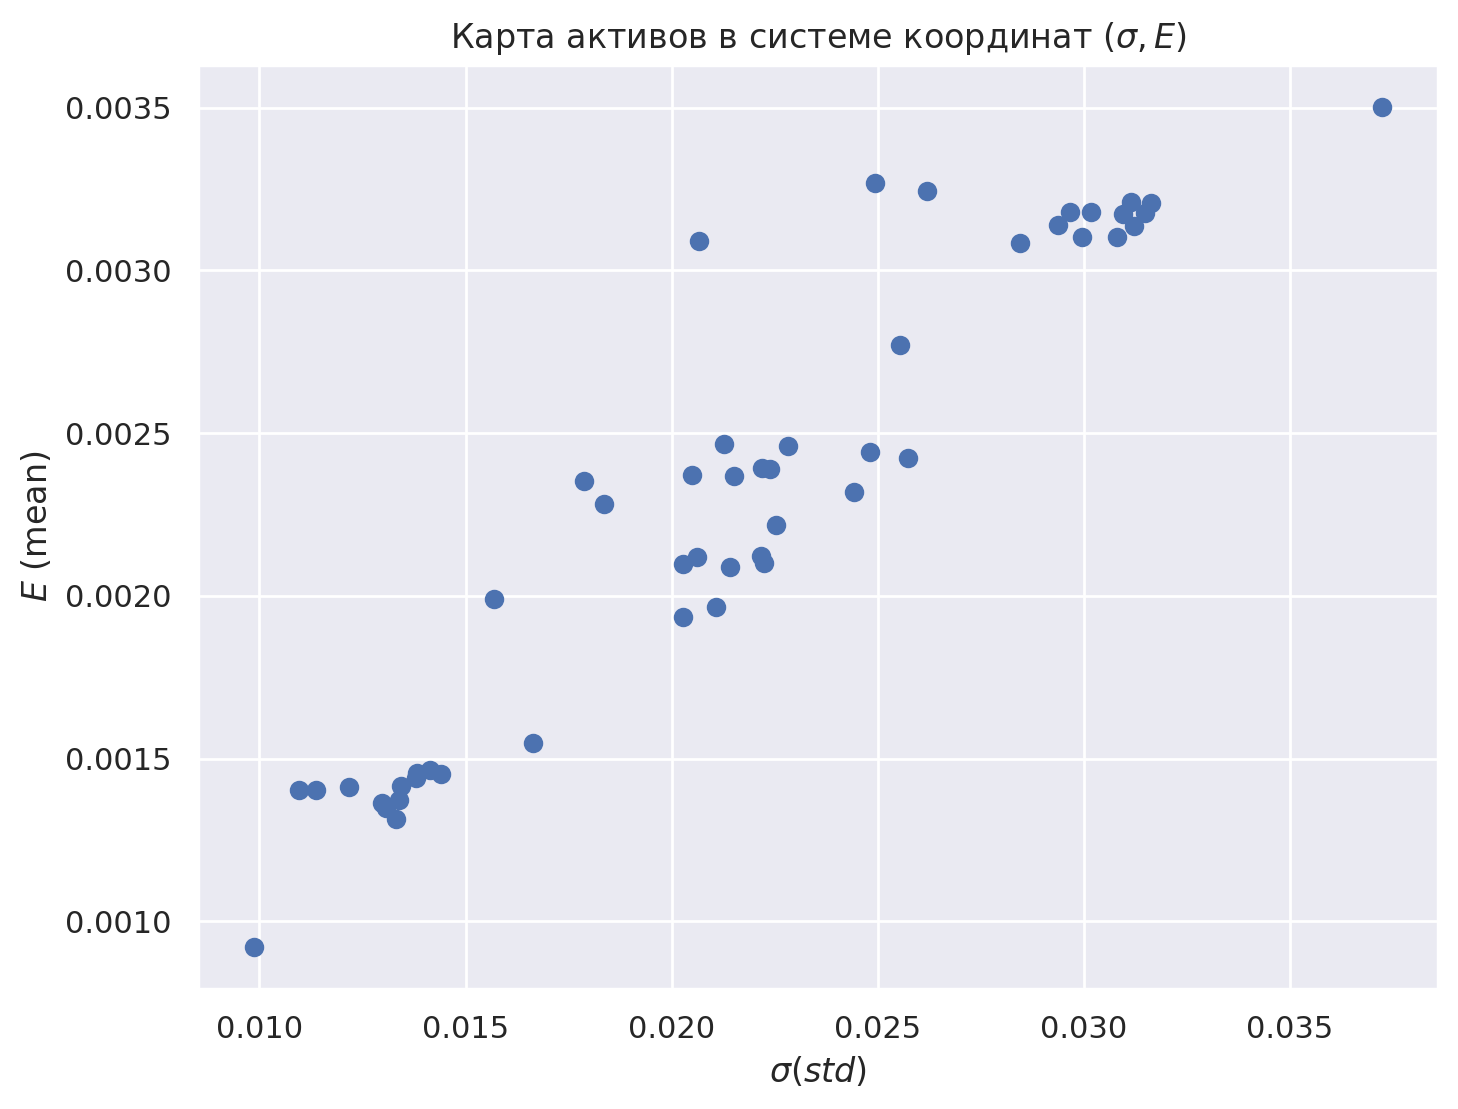

In [9]:
plt.scatter(returns.std(), returns.mean())

plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.title('Карта активов в системе координат $(\sigma, E)$')
plt.show()

Сформулируем задачи, которые будут решаться:

**1. Поиск портфеля без запрета коротких продаж:**
$$
\begin{cases}
\dfrac{1}{2} x^T \Sigma x \to \min \\
\mathbf{1}^T x = 1 \\
E^T x = E_0 
\end{cases}
$$
где $\Sigma$ - ковариационная матрица активов $(R_1,\ldots,R_N)^T$, $E=(E(R_1),\ldots,E(R_N))^T$, $\mathbf{1}=(1,\ldots,1)^T$, $x=(x_1,\ldots,x_N)^T$. Решением такой системы в предположении $det(\Sigma)\neq 0$ является:
$$
x=-\lambda \Sigma^{-1} \mathbf{1} - \mu \Sigma^{-1} E
$$
где $\lambda$ и $\mu$ находятся из системы уравнений:
$$
\begin{pmatrix}
\mathbf{1}^T \Sigma^{-1} \mathbf{1} & \mathbf{1}^T \Sigma^{-1}E \\
\mathbf{1}^T \Sigma^{-1}E & E^T \Sigma^{-1}E
\end{pmatrix}
\begin{pmatrix}\lambda \\ \mu \end{pmatrix} =
\begin{pmatrix}-1 \\ -E_0 \end{pmatrix}
$$

**2. Поиск портфеля с минимальным риском без запрета коротких продаж**
$$
\begin{cases}
\dfrac{1}{2} x^T \Sigma x \to \min \\
\mathbf{1}^T x = 1
\end{cases}
$$
Решением такой системы в предположении $det(\Sigma)\neq 0$ является:
$$
x = \dfrac{1}{\mathbf{1}^T \Sigma^{-1} \mathbf{1}} \Sigma^{-1} \mathbf{1}
$$

**3. Поиск портфеля с запретом коротких продаж**
$$
\begin{cases}
\dfrac{1}{2} x^T \Sigma x \to \min \\
\mathbf{1}^T x = 1 \\
E^T x = E_0 \\
x_i \geq 0, \; i=1,\ldots,N
\end{cases}
$$
Для нахождения решения данной задачи оптимизации используется численный метод **Sequential quadratic programming** (SLSQP в пакете SciPy).

**4. Поиск портфеля с минимальным риском с запретом коротких продаж**
$$
\begin{cases}
\dfrac{1}{2} x^T \Sigma x \to \min \\
\mathbf{1}^T x = 1 \\
x_i \geq 0, \; i=1,\ldots,N
\end{cases}
$$
Для нахождения решения данной задачи оптимизации используется численный метод **Sequential quadratic programming** (SLSQP в пакете SciPy).

In [10]:
import numpy as np
from scipy.optimize import minimize
from numpy.random import random

def sle_solver(a11: float, a12: float, a21: float, a22: float, b1: float, b2: float) -> tuple[float, float]:
    det = a11 * a22 - a12 * a21
    x1 = b1 * a22 - b2 * a21
    x2 = a11 * b2 - a21 * b1
    return x1 / det, x2 / det

def with_short_sales(S: np.ndarray, E: np.ndarray, E0: int) -> np.ndarray:
    ones = np.ones(len(S))
    S_inv = np.linalg.inv(S)
    a11 = np.dot(np.dot(ones, S_inv), ones)
    a12 = np.dot(np.dot(ones, S_inv), E)
    a22 = np.dot(np.dot(E, S_inv), E)
    lam, mu =  sle_solver(a11, a12, a12, a22, -1, -E0)
    x = -lam * np.dot(S_inv, ones) - mu * np.dot(S_inv, E)
    return x

def minimal_risk_with_short_sales(S: np.ndarray, E: np.ndarray) -> np.ndarray:
    ones = np.ones(len(S))
    S_inv = np.linalg.inv(S)
    return np.dot(S_inv, ones) / np.dot(np.dot(ones, S_inv), ones)

def without_short_sales(S: np.ndarray, E: np.ndarray, E0: int) -> np.ndarray:
    def objective(x):
        return np.dot(np.dot(x,S),x) / 2
    def constraint1(x):
        return np.sum(x) - 1
    def constraint2(x):
        return np.dot(x, E) - E0
    x0 = np.array([1 for i in range(len(E))])
    bounds = ((0.0, 1.0) for i in range(len(E)))
    cons=[{'type': 'eq','fun': constraint1}, {'type': 'eq','fun': constraint2}]
    solver = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
    if solver.success:
        return solver.x
    return None

def minimal_risk_without_short_sales(S: np.ndarray, E: np.ndarray) -> np.ndarray:
    def objective(x):
        return np.dot(np.dot(x,S),x) / 2
    def constraint1(x):
        return np.sum(x) - 1
    x0 = np.array([1 for i in range(len(E))])
    bounds = ((0.0, 1.0) for i in range(len(E)))
    cons=[{'type': 'eq','fun': constraint1}]
    solver = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
    if solver.success:
        return solver.x
    return None

In [11]:
def calcuate_sigma(S: np.ndarray, x: np.ndarray) -> float:
    return np.sqrt(np.dot(np.dot(x,S),x))

def draw_efficient_frontier(S: np.ndarray, E: np.ndarray, indexes_returns: float):
    x_min_with_short_sales = minimal_risk_with_short_sales(S, E)
    E0_min_with_short_sales = np.dot(x_min_with_short_sales, E)

    plt.scatter(calcuate_sigma(S,x_min_with_short_sales), E0_min_with_short_sales, 
    label='Портфель с мин. риском без запрета коротких продаж')

    E_with_short_sales = np.linspace(E0_min_with_short_sales, 0.004, 100)
    sigma_with_short_sales = [calcuate_sigma(S, with_short_sales(S, E, i)) for i in E_with_short_sales]
    plt.plot(sigma_with_short_sales, E_with_short_sales, label='Эфф.фронт с запретом коротких продаж')

    x_min_without_short_sales = minimal_risk_without_short_sales(S,E)
    E0_min_without_short_sales = np.dot(x_min_without_short_sales, E)

    plt.scatter(calcuate_sigma(S,x_min_without_short_sales), E0_min_without_short_sales, 
    label='Портфель с мин. риском с запретом коротких продаж')

    E_without_short_sales = np.linspace(E0_min_without_short_sales, 0.0035, 100)
    sigma_without_short_sales = [calcuate_sigma(S, without_short_sales(S, E, i)) for i in E_without_short_sales]
    plt.plot(sigma_without_short_sales, E_without_short_sales, label='Эфф.фронт без запрета коротких продаж')

    x_equal = [1/len(E) for i in range(len(E))]
    sigma_equal = calcuate_sigma(S, x_equal)
    E_equal = np.dot(x_equal, E)
    plt.scatter(sigma_equal, E_equal, label='Портфель с равными долями')

    plt.scatter(np.std(indexes_returns), np.mean(indexes_returns), label='Индекс рынка')
    
    plt.xlabel('$\sigma (std)$')
    plt.ylabel('$E$ (mean)')
    plt.title('Карта портфелей в системе координат $(\sigma, E)$')
    plt.legend()

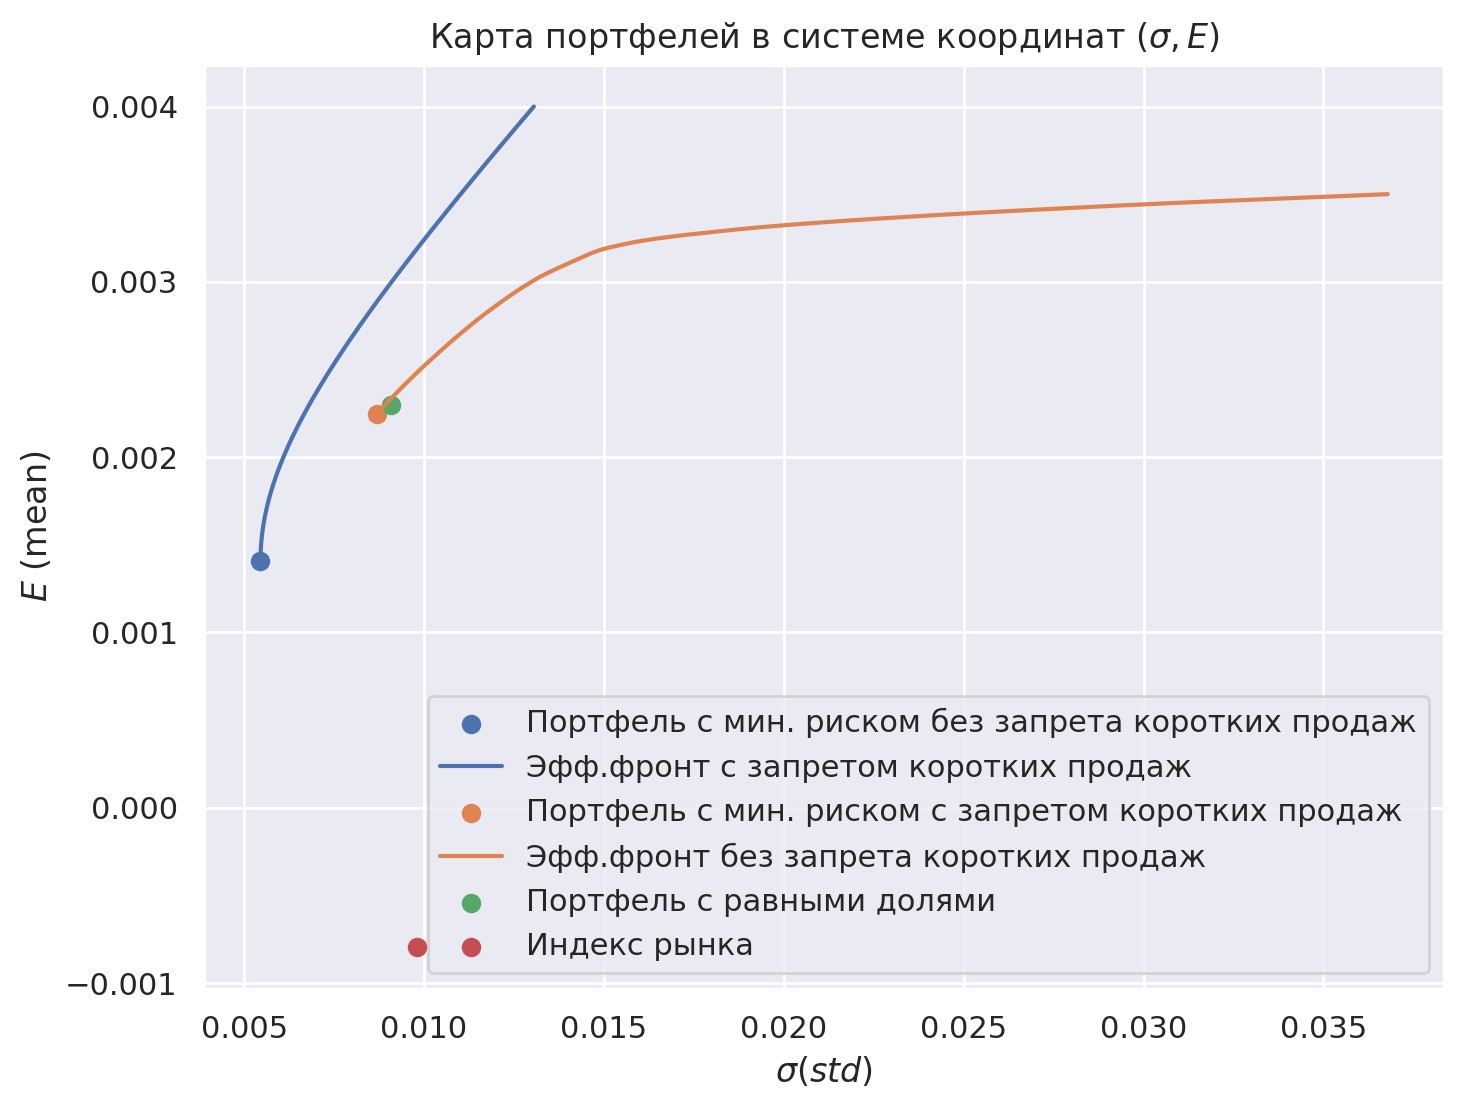

In [12]:
draw_efficient_frontier(np.array(returns.cov()), np.array(returns.mean()), indexes_returns)
plt.show()

# 2. Portfolio selection problem

Среди 50 активов отберем 10 активов с наибольшей средней доходностью.

In [13]:
top10 = list(dict(returns.mean().sort_values(ascending=False)[:10]).keys())
top10_returns = returns[top10]

Визуализируем эти активы.

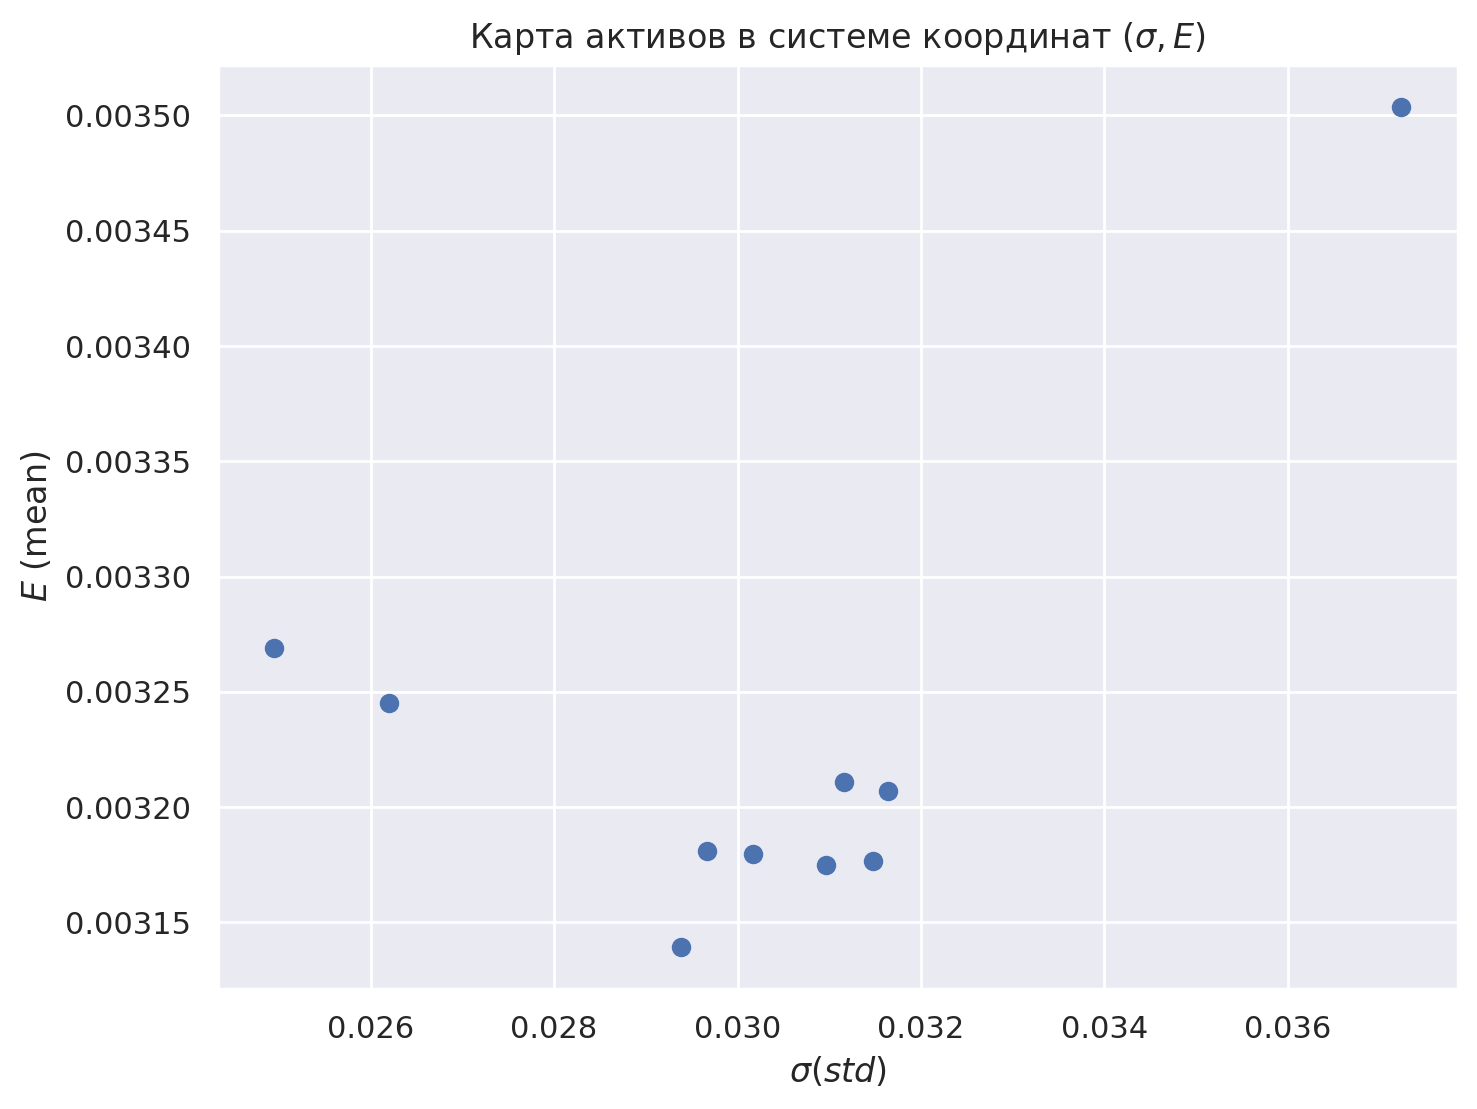

In [14]:
plt.scatter(top10_returns.std(), top10_returns.mean())

plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.title('Карта активов в системе координат $(\sigma, E)$')
plt.show()

In [15]:
def draw_efficient_frontier(S: np.ndarray, E: np.ndarray, n: int):
    x_min_with_short_sales = minimal_risk_with_short_sales(S, E)
    E0_min_with_short_sales = np.dot(x_min_with_short_sales, E)

    E_with_short_sales = np.linspace(E0_min_with_short_sales, 0.004, 100)
    sigma_with_short_sales = [calcuate_sigma(S, with_short_sales(S, E, i)) for i in E_with_short_sales]
    plt.plot(sigma_with_short_sales, E_with_short_sales, label=f'Эфф.фронт без запрета коротких продаж ({n} акций)')

    x_min_without_short_sales = minimal_risk_without_short_sales(S,E)
    E0_min_without_short_sales = np.dot(x_min_without_short_sales, E)

    E_without_short_sales = np.linspace(E0_min_without_short_sales, 0.0035, 100)
    sigma_without_short_sales = [calcuate_sigma(S, without_short_sales(S, E, i)) for i in E_without_short_sales]
    plt.plot(sigma_without_short_sales, E_without_short_sales, label=f'Эфф.фронт с запретом коротких продаж ({n} акций)')

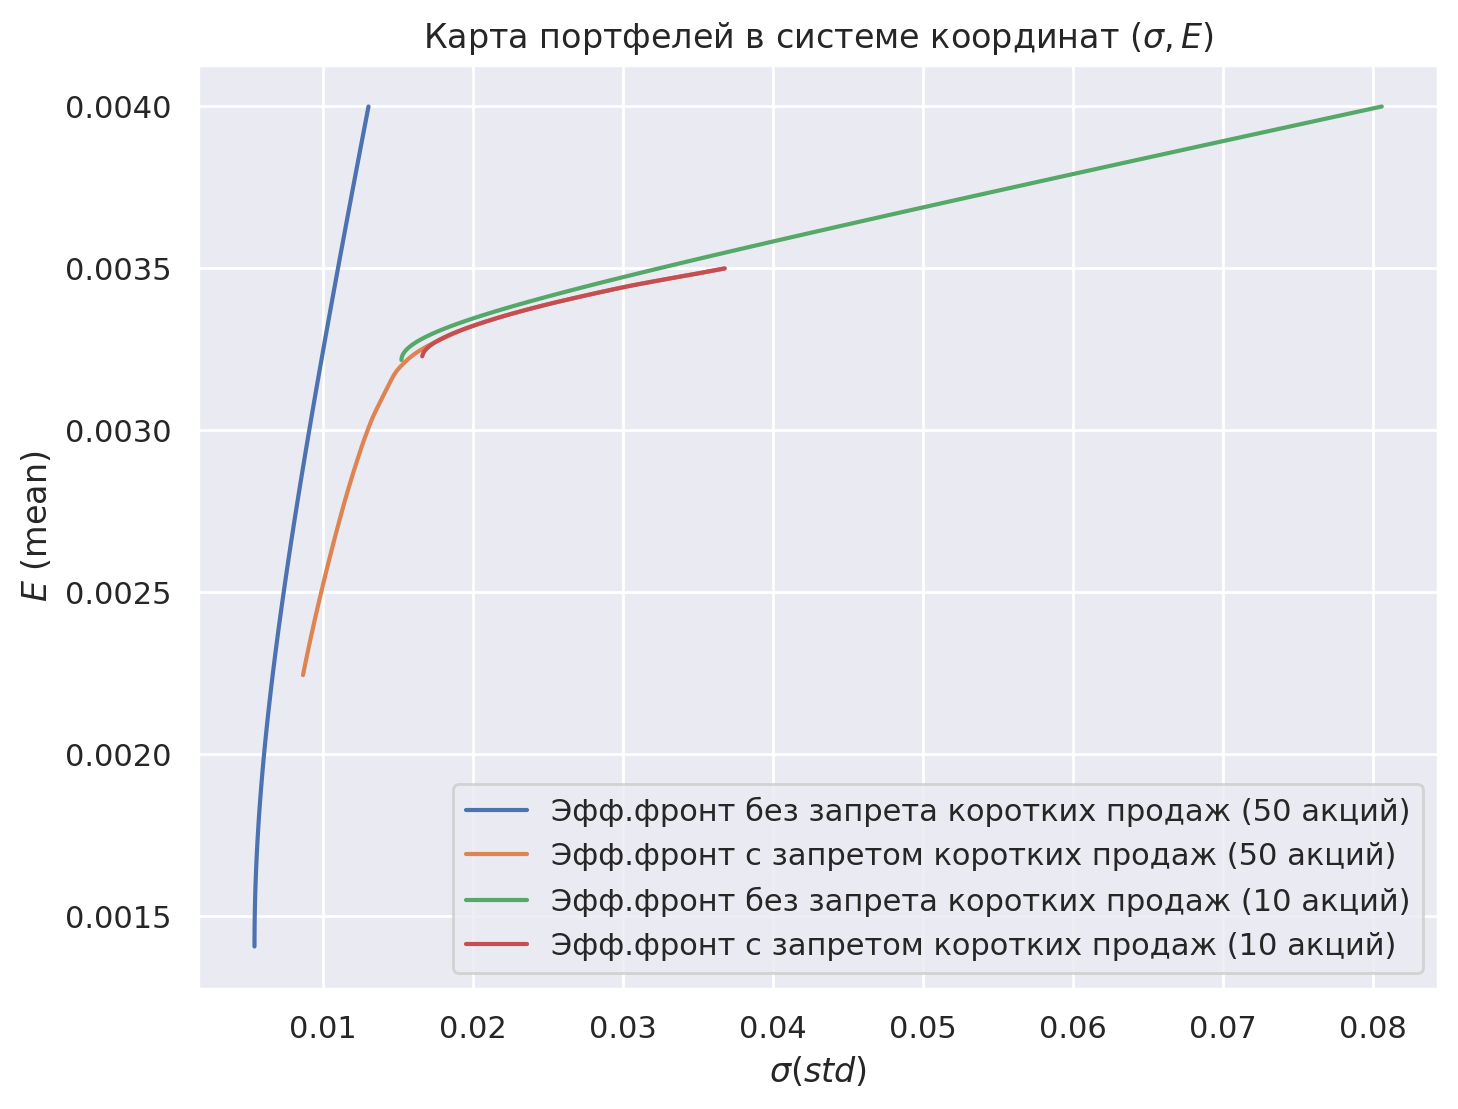

In [16]:
draw_efficient_frontier(np.array(returns.cov()), np.array(returns.mean()), 50)
draw_efficient_frontier(np.array(top10_returns.cov()), np.array(top10_returns.mean()), 10)
plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.title('Карта портфелей в системе координат $(\sigma, E)$')
plt.legend()
plt.show()

# 3. Risk aversion

**Короткие продажи разрешены:**
$$
\begin{cases}
-E(x) + RA \cdot \sigma(x) \to min \\
\sum_{i=1}^N x_i = 1
\end{cases}
$$
где $E(x)=E^T x$, $\sigma(x)=\sqrt{x^T \Sigma x}$, $RA$ - отношение к риску.

**Короткие продажи запрещены:**
$$
\begin{cases}
-E(x) + RA \cdot \sigma(x) \to min \\
\sum_{i=1}^N x_i = 1 \\
x_i \geq 0, \; i=1,\ldots,N
\end{cases}
$$

Положим $RA=3$.

In [208]:
def risk_aversion_with_short_sales(S: np.ndarray, E: np.ndarray, RA: float = 3) -> np.ndarray:
    def objective(x):
        return -np.dot(E,x) + RA * np.sqrt(np.dot(np.dot(x,S),x))
    def constraint1(x):
        return np.sum(x) - 1
    x0 = np.array([1 for i in range(len(E))])
    cons=[{'type': 'eq','fun': constraint1}]
    solver = minimize(objective, x0, method='SLSQP', constraints=cons)
    if solver.success:
        return solver.x
    return None

def risk_aversion_without_short_sales(S: np.ndarray, E: np.ndarray, RA: float = 3) -> np.ndarray:
    def objective(x):
        return -np.dot(E,x) + RA * np.sqrt(np.dot(np.dot(x,S),x))
    def constraint1(x):
        return np.sum(x) - 1
    x0 = np.array([1 for i in range(len(E))])
    cons=[{'type': 'eq','fun': constraint1}]
    bounds = ((0.0, 1.0) for i in range(len(E)))
    solver = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
    if solver.success:
        return solver.x
    return None

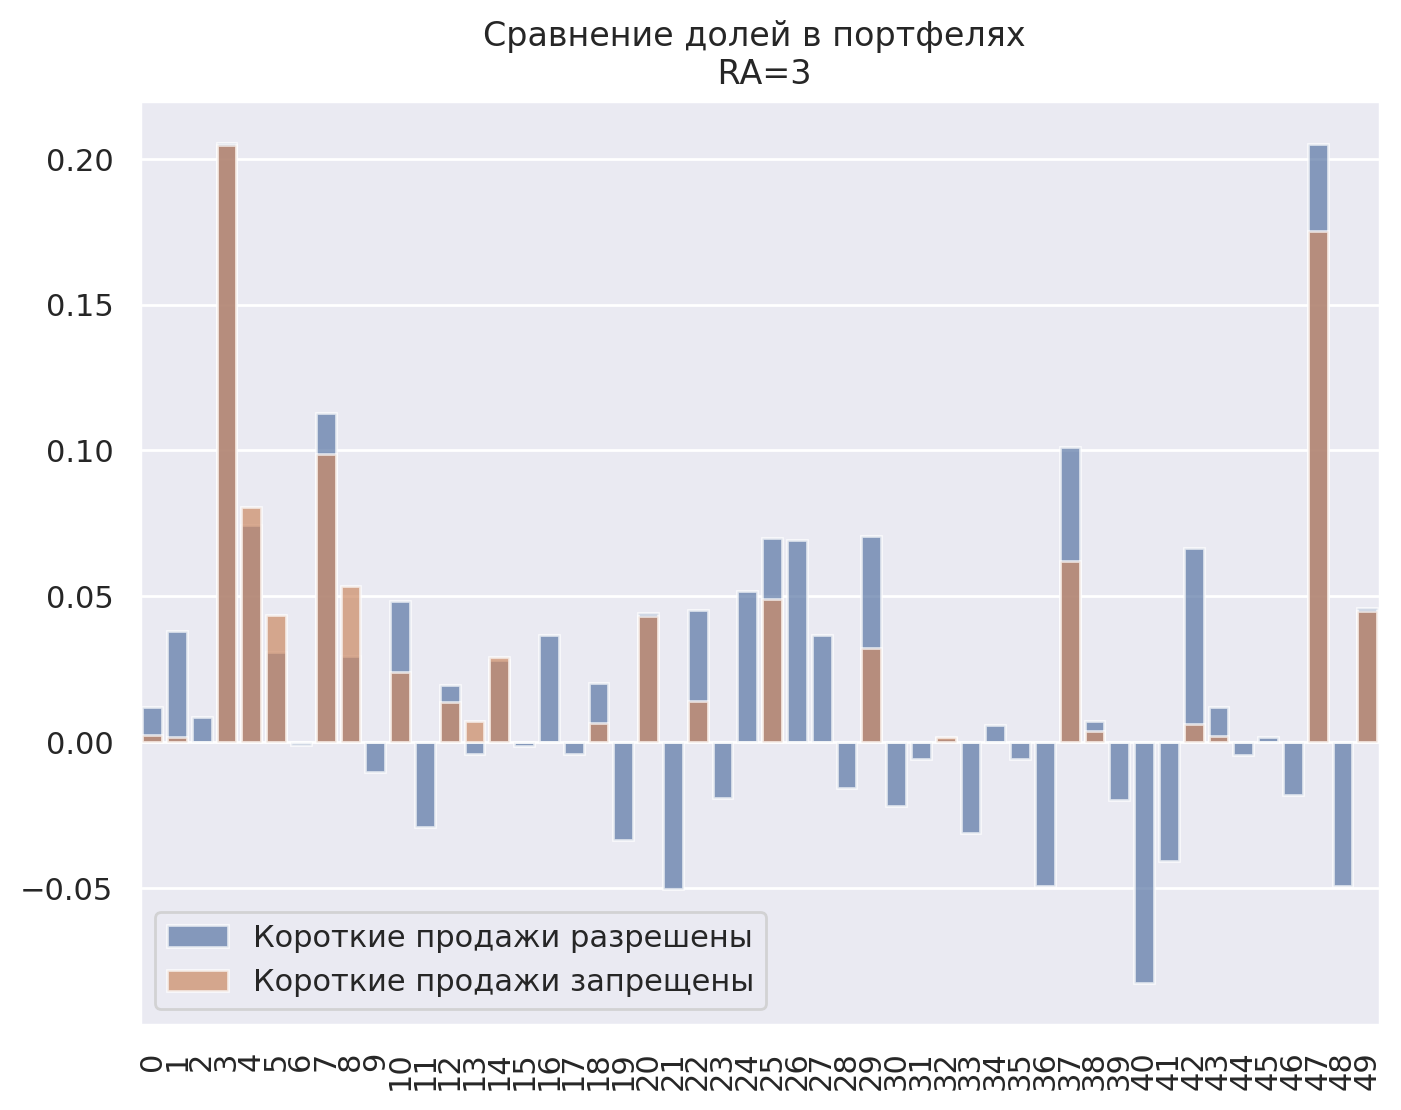

In [209]:
x_risk_aversion_with_short_sales = risk_aversion_with_short_sales(np.array(returns.cov()), np.array(returns.mean()))
x_risk_aversion_without_short_sales = risk_aversion_without_short_sales(np.array(returns.cov()), np.array(returns.mean()))

plt.title('Сравнение долей в портфелях \n RA=3')
sns.barplot(x_risk_aversion_with_short_sales, alpha=0.7, label='Короткие продажи разрешены')
sns.barplot(x_risk_aversion_without_short_sales, alpha=0.7, label='Короткие продажи запрещены')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Доли без запрета коротких продаж:

In [218]:
np.round(x_risk_aversion_with_short_sales,4)

array([ 0.0119,  0.0381,  0.0086,  0.2056,  0.0743,  0.031 , -0.0009,
        0.1128,  0.0294, -0.0102,  0.0483, -0.0292,  0.0195, -0.0041,
        0.0283, -0.0014,  0.0367, -0.0042,  0.0201, -0.0338,  0.0444,
       -0.0506,  0.0453, -0.0194,  0.0516,  0.0698,  0.0694,  0.0365,
       -0.0158,  0.0708, -0.0219, -0.0057,  0.0013, -0.0312,  0.0057,
       -0.0057, -0.0495,  0.1011,  0.0073, -0.0198, -0.0825, -0.041 ,
        0.0665,  0.012 , -0.0045,  0.0016, -0.0181,  0.2052, -0.0495,
        0.0459])

Доли с запретом коротких продаж:

In [219]:
np.round(x_risk_aversion_without_short_sales,4)

array([0.0025, 0.0018, 0.    , 0.2049, 0.0805, 0.0435, 0.    , 0.0988,
       0.0535, 0.    , 0.0239, 0.    , 0.0136, 0.0072, 0.0291, 0.    ,
       0.    , 0.    , 0.0067, 0.    , 0.0431, 0.    , 0.0141, 0.    ,
       0.    , 0.049 , 0.    , 0.    , 0.    , 0.0322, 0.    , 0.    ,
       0.0016, 0.    , 0.    , 0.    , 0.    , 0.0619, 0.0037, 0.    ,
       0.    , 0.    , 0.006 , 0.002 , 0.    , 0.    , 0.    , 0.1753,
       0.    , 0.045 ])

Сравним VaR.

In [210]:
R_with_short_sales = np.dot(np.array(returns), x_risk_aversion_with_short_sales)
R_without_short_sales = np.dot(np.array(returns), x_risk_aversion_without_short_sales)

print(f'Короткие продажи разрешены, RA = 3:\n E(x) = {np.round(np.mean(R_with_short_sales),4)} \n std(x) = {np.round(np.std(R_with_short_sales),4)}')
print(f' VaR(-R) на уровне 0.9 = {np.round(np.quantile(-R_with_short_sales, 0.9),4)}')
print(f' VaR(-R) на уровне 0.95 = {np.round(np.quantile(-R_with_short_sales, 0.95),4)}')

print()

print(f'Короткие продажи запрещены, RA = 3:\n E(x) = {np.round(np.mean(R_without_short_sales),4)} \n std(x) = {np.round(np.std(R_without_short_sales),4)}')
print(f' VaR(-R) на уровне 0.9 = {np.round(np.quantile(-R_without_short_sales, 0.9),4)}')
print(f' VaR(-R) на уровне 0.95 = {np.round(np.quantile(-R_without_short_sales, 0.95),4)}')

Короткие продажи разрешены, RA = 3:
 E(x) = 0.0015 
 std(x) = 0.0055
 VaR(-R) на уровне 0.9 = 0.0054
 VaR(-R) на уровне 0.95 = 0.0068

Короткие продажи запрещены, RA = 3:
 E(x) = 0.0015 
 std(x) = 0.0057
 VaR(-R) на уровне 0.9 = 0.0053
 VaR(-R) на уровне 0.95 = 0.0073


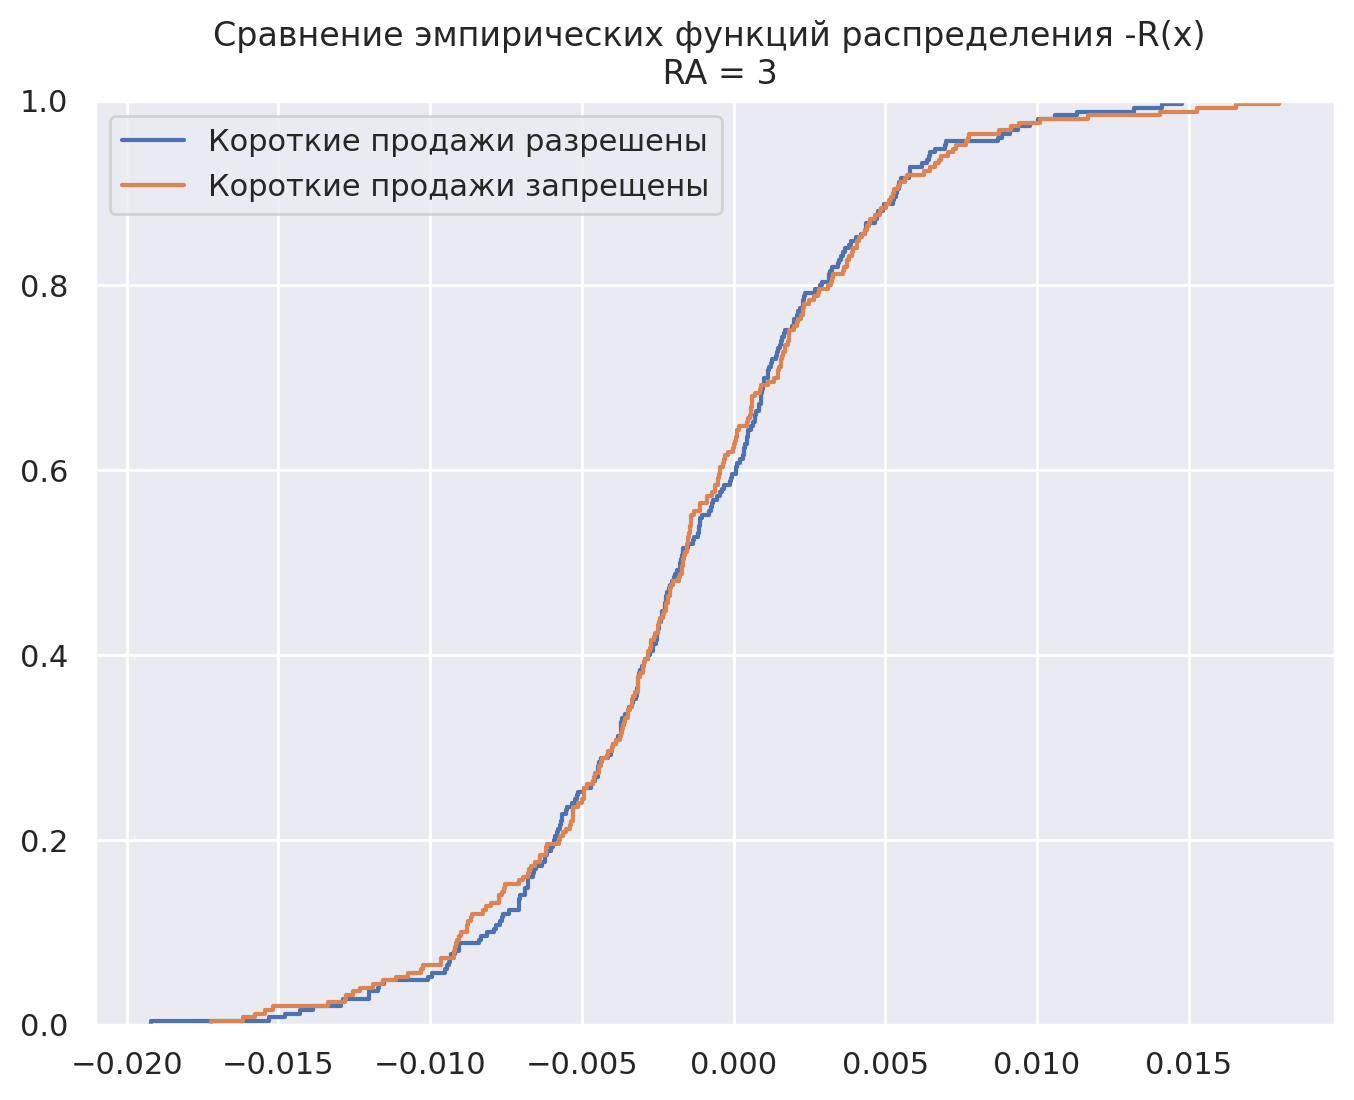

In [213]:
plt.title('Сравнение эмпирических функций распределения -R(x) \n RA = 3')
plt.ecdf(-R_with_short_sales, label='Короткие продажи разрешены')
plt.ecdf(-R_without_short_sales, label='Короткие продажи запрещены')
plt.legend()
plt.show()